In [78]:
import numpy as np
import sympy as sym
from sympy.solvers import ode
from sympy.plotting import plot
sym.init_printing(use_unicode=True)
%matplotlib inline

# 線形代数基礎

In [92]:
#行列の記法
A1_s = sym.Matrix([
    [1, 2, 3],
    [4, 5, 6]
])
A1_s

⎡1  2  3⎤
⎢       ⎥
⎣4  5  6⎦

In [83]:
A1_n = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
A1_n

array([[1, 2, 3],
       [4, 5, 6]])

In [85]:
#転置
A1_s.T

⎡1  4  7⎤
⎢       ⎥
⎢2  5  8⎥
⎢       ⎥
⎣3  6  9⎦

In [84]:
A1_n.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [93]:
#SymPyからNumPyへの変換
A1_n == sym.matrix2numpy(A1_s)
A1_n

array([[1, 2, 3],
       [4, 5, 6]])

In [95]:
sym.Matrix.zeros(2, 3)

⎡0  0  0⎤
⎢       ⎥
⎣0  0  0⎦

In [96]:
np.zeros([2, 3])

array([[0., 0., 0.],
       [0., 0., 0.]])

In [98]:
#単位行列
sym.eye(3)

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

In [10]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [11]:
sym.ones(3)

⎡1  1  1⎤
⎢       ⎥
⎢1  1  1⎥
⎢       ⎥
⎣1  1  1⎦

In [12]:
np.ones(3)

array([1., 1., 1.])

In [100]:
#対角行列
sym.diag(1, 2, 3)

⎡1  0  0⎤
⎢       ⎥
⎢0  2  0⎥
⎢       ⎥
⎣0  0  3⎦

In [14]:
np.diag([1, 2, 3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [15]:
#行列式
A_s = sym.Matrix([
    [1,2,3],
    [2,3,4],
    [1,1,2]
])
A_s.det()

In [16]:
A_n = np.array([
    [1,2,3],
    [2,3,4],
    [1,1,2]
])
np.linalg.det(A_n)

In [17]:
#逆行列
A_s.inverse_ADJ()

⎡-2  1   1 ⎤
⎢          ⎥
⎢0   1   -2⎥
⎢          ⎥
⎣1   -1  1 ⎦

In [18]:
np.linalg.inv(A_n)

array([[-2.,  1.,  1.],
       [ 0.,  1., -2.],
       [ 1., -1.,  1.]])

In [19]:
#行列の和，スカラー積
sym.diag(2, 4, 6) / 2 + 10 * sym.ones(3)

⎡11  10  10⎤
⎢          ⎥
⎢10  12  10⎥
⎢          ⎥
⎣10  10  13⎦

In [20]:
#行列積
A_s = sym.Matrix([
    [1,2,3],
    [4,5,6]
])
B_s = sym.Matrix([
    [1,2],
    [0,1],
    [0,1]
])
A_s * B_s

⎡1  7 ⎤
⎢     ⎥
⎣4  19⎦

In [21]:
A_n = np.array([
    [1,2,3],
    [4,5,6]
])
B_n = np.array([
    [1,2],
    [0,1],
    [0,1]
])
A_n.dot(B_n)

array([[ 1,  7],
       [ 4, 19]])

## 問題演習

板書参考

In [101]:
#(1)
A = sym.Matrix([
    [1, 2],
    [3, 4]
])
A

⎡1  2⎤
⎢    ⎥
⎣3  4⎦

In [104]:
#(2)
A + 5 * sym.eye(2)

⎡6  2⎤
⎢    ⎥
⎣3  9⎦

# 微分方程式モデル

## 人口変化のモデル

### malthus増殖1
$$
\frac{dN}{dt} = bN
$$

### malthus増殖2
$$
\frac{dN}{dt} = bN - dN
$$

数値解

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

In [106]:
def malthus(N0, b, d, dt, tEnd):
    # 初期値
    N = N0
    t = 0.0

    # 時間の設定
    iEnd = int(tEnd/dt)+1

    NList = [N]
    tList = [t]
    for i in range(iEnd):
        t = dt*i
        NN = N + dt * (b*N - d*N)
        N = NN
        tList.append(t)
        NList.append(N)
    return (tList, NList)

In [134]:
# モデルのパラメータ1 b>d
N0 = 10

b = 0.3
d = 0

dt = 0.001
tEnd=10

tList, NList = malthus(N0, b, d, dt, tEnd)

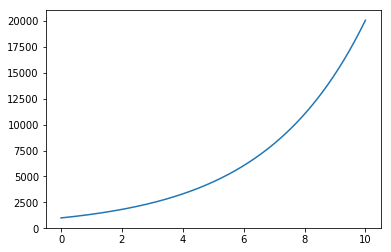

In [135]:
# 時間発展のプロット
plt.plot(tList, NList)

Sympyを使う

In [174]:
t, b, d = sym.symbols("t b d")

In [175]:
type(t)

sympy.core.symbol.Symbol

In [176]:
N = sym.Function('N')

In [177]:
type(N)

sympy.core.function.UndefinedFunction

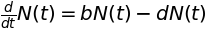

In [178]:
mal_eq1 = sym.Eq(N(t).diff(t, 1), b * N(t) - d * N(t))
mal_eq1

In [179]:
#型判定
ode.classify_ode(mal_eq1)

('separable',
 '1st_exact',
 '1st_linear',
 'almost_linear',
 '1st_power_series',
 'lie_group',
 'nth_linear_constant_coeff_homogeneous',
 'separable_Integral',
 '1st_exact_Integral',
 '1st_linear_Integral',
 'almost_linear_Integral')

In [180]:
# 一般解
mal_ans1 = sym.dsolve(mal_eq1, hint = '1st_linear')
mal_ans1

In [170]:
# 特殊解
mal_ans2 = sym.dsolve(mal_eq1, ics={N(0):1}, hint = "separable")
mal_ans2

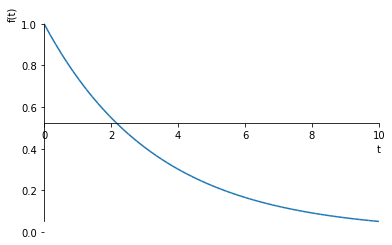

In [173]:
#グラフ
mal_ans3 = mal_ans2.subs([(b, 0.3), (d, 0.6)])
plot(mal_ans3.rhs, (t, 0, 10))

### Gompertz増殖
$$
\frac{dN}{dt} = R(t) N
$$

特に
$$
R(t)=e^{(-t/a)}
$$

In [181]:
t, b, d, a = sym.symbols("t b d a")

In [182]:
N = sym.Function('N')
R = sym.Function('R')

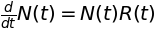

In [183]:
gom_eq1 = sym.Eq(sym.Derivative(N(t)), R(t) * N(t))
gom_eq1

In [184]:
# 一般解
gom_ans1 = sym.dsolve(gom_eq1, hint = "separable")
gom_ans1

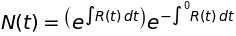

In [185]:
# 特殊解
gom_ans2 = sym.dsolve(gom_eq1, ics={N(0):1}, hint = "separable")
gom_ans2

In [186]:
# 指数増加（減衰も同様），N(0)→1，R(t)=2
gom_eq2 = gom_eq1.subs({R(t):2})

gom_ans3 = sym.dsolve(gom_eq2, ics={N(0):1})
gom_ans3

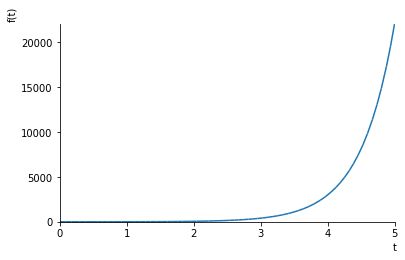

In [187]:
plot(gom_ans3.rhs, (t, 0, 5))

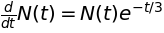

In [188]:
# 増加の飽和，N(0)→1，R(t)=e^(-t/3)
gom_eq3 = gom_eq1.subs({R(t):sym.exp(-t/3)})
gom_eq3

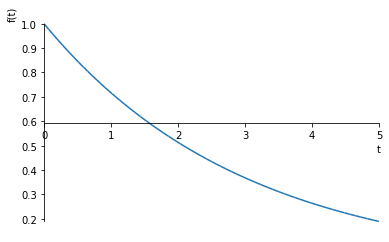

In [189]:
#増加率減少
plot(sym.exp(-t/3), (t, 0, 5))

In [190]:
gom_ans4 = sym.dsolve(gom_eq3, ics={N(0):1})
gom_ans4

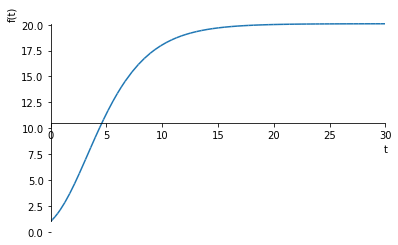

In [191]:
#gompertz曲線
plot(gom_ans4.rhs, (t, 0, 30))

### Logistic方程式

logistic増殖
$$
\frac{dN}{dt} = rN(1 - \frac{N}{K})
$$

In [44]:
def logistic(N0, r, K, dt, tEnd):
    # 初期値
    N = N0
    t = 0.0

    # 時間の設定
    iEnd = int(tEnd/dt)+1

    NList = [N]
    tList = [t]
    for i in range(iEnd):
        t = dt*i
        NN = N + dt * (r * N * (1 - N/K))
        N = NN
        tList.append(t)
        NList.append(N)
    return (tList, NList)

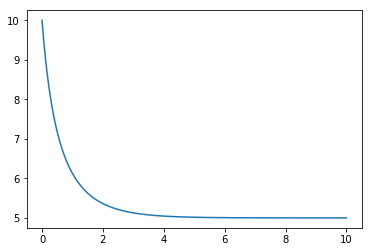

In [45]:
# モデルのパラメータ1 N0>K
N0 = 10

r = 1
K = 5

dt = 0.001
tEnd=10

tList, N1List = logistic(N0, r, K, dt, tEnd)

# 時間発展のプロット
plt.plot(tList, N1List)

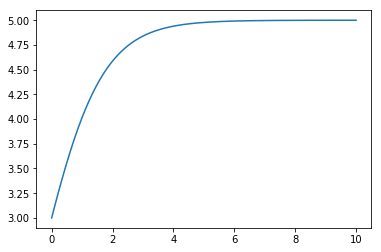

In [46]:
# モデルのパラメータ2 2/K<N0<K
N0 = 3

r = 1
K = 5

dt = 0.001
tEnd=10

tList, N2List = logistic(N0, r, K, dt, tEnd)

# 時間発展のプロット
plt.plot(tList, N2List)

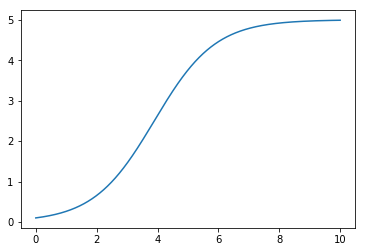

In [47]:
# モデルのパラメータ3 N0<2/K
N0 = 0.1

r = 1
K = 5

dt = 0.001
tEnd=10

tList, N3List = logistic(N0, r, K, dt, tEnd)

# 時間発展のプロット
plt.plot(tList, N3List)

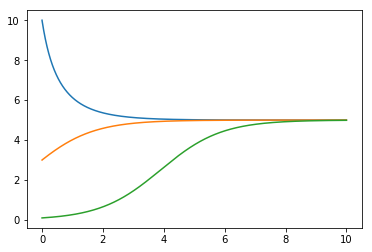

In [48]:
# 時間発展のプロット
plt.plot(tList, N1List)
plt.plot(tList, N2List)
plt.plot(tList, N3List)

In [49]:
t, r, K = sym.symbols("t r K")
N = sym.Function('N')

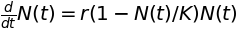

In [50]:
#logistic方程式
log_eq1 = sym.Eq(sym.Derivative(N(t)), r * N(t) * (1 - N(t)/K))
log_eq1

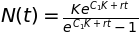

In [51]:
log_ans1 = sym.dsolve(log_eq1)
log_ans1

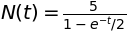

In [52]:
#収束1 N(0)=1
log_eq2 = log_eq1.subs([(r, 1),(K,5)])

log_ans2 = sym.dsolve(log_eq2, ics={N(0):10})
log_ans2

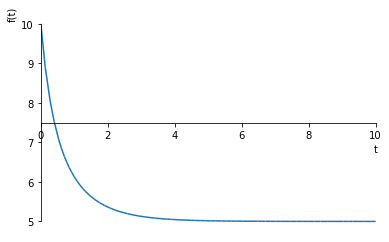

In [53]:
plot(log_ans2.rhs, (t, 0, 10))

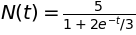

In [54]:
#収束2 N(0)=3
log_eq3 = log_eq1.subs([(r, 1),(K,5)])

log_ans3 = sym.dsolve(log_eq3, ics={N(0):3})
log_ans3

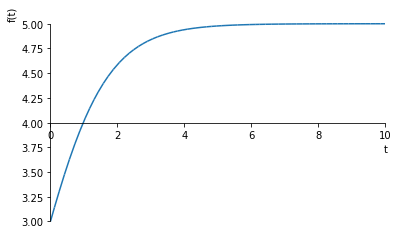

In [55]:
plot(log_ans3.rhs, (t, 0, 10))

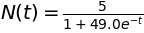

In [56]:
#収束3 N(0)=0.1
log_eq4 = log_eq1.subs([(r, 1),(K,5)])

log_ans4 = sym.dsolve(log_eq4, ics={N(0):0.1})
log_ans4

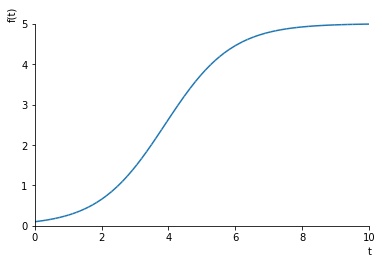

In [57]:
plot(log_ans4.rhs, (t, 0, 10))

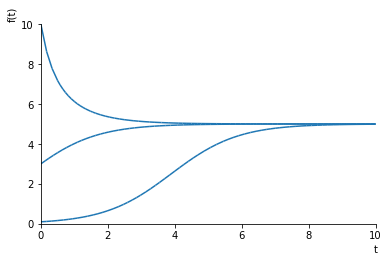

In [58]:
# 時間発展のプロット
plot(log_ans2.rhs, log_ans3.rhs, log_ans4.rhs, (t, 0, 10))

### 捕食者ー被食者モデルにおけるLotka-Volterra方程式（発展）

定義式：
$$
\frac{dN}{d\tau} = N(\alpha-bP), \\
\frac{dP}{d\tau} = P(cN-d)
$$

N(t)：被食者，P(t)：捕食者，各係数について，

(1) αN：被食者の自然増加

(2) -bNP：被食者の捕食による減少

(3) -dP：捕食者の自然減少

(4) cNP：捕食者の捕食による増加

ここで，無次元化を行うことで値の相対的評価を可能にする。

$$
u = \frac{cN}{d}, \\
v = \frac{bP}{\alpha}, \\
t = a \tau, \\
a = \frac{d}{\alpha}
$$


定義式（無次元化）：
$$
\frac{du}{dt} = u(1-v), \\
\frac{dv}{dt} = av(u-1)
$$

u：被食者，v：捕食者，a：捕食者の強さ/被食者の強さ，と考える

解析解を得るのは困難，まず局所安定性を調べる。

In [59]:
u, v, t, a = sym.symbols("u v t a")

In [60]:
sym.solve(
    [
        sym.Eq(u*(1-v), 0),
        sym.Eq(a*v*(u-1), 0)
    ], [u, v])

平衡点は（0,0）（1,1）にある。
ここで，ヤコビ行列は

In [61]:
F = sym.Matrix([u*(1-v), a*v*(u-1)])
X = sym.Matrix([u, v])
J = F.jacobian(X)
J

⎡1 - v     -u    ⎤
⎢                ⎥
⎣ a⋅v   a⋅(u - 1)⎦

(0,0)のとき，

In [62]:
J1 = J.subs([[u, 0], [v, 0]])
J1

⎡1  0 ⎤
⎢     ⎥
⎣0  -a⎦

このヤコビ行列の最大固有値を調べれば良い．すなわち，
$$
|\mathbf{J}_1 - \lambda \mathbf{I}| = 0
$$
を$\lambda$について解き，一番大きな$\lambda$を調べる．

In [63]:
λ = sym.symbols("λ")
I = sym.eye(2)

In [64]:
(J1 - λ*I).det()

In [65]:
sym.solve(
    sym.Eq((J1 - λ*I).det(), 0),
    λ)

In [66]:
J1.eigenvals()

一つの固有値が正なので，uとvは指数関数的に増大→不安定

(1,1)のとき

In [67]:
J2 = J.subs([[u, 1], [v, 1]])
J2

⎡0  -1⎤
⎢     ⎥
⎣a  0 ⎦

In [68]:
(J2 - λ*I).det()

In [69]:
sym.solve(
    sym.Eq((J2 - λ*I).det(), 0),
    λ)

In [70]:
J2.eigenvals()

$$
\lambda_1, \ \lambda_2 = \pm i \sqrt{a}
$$
で固有値が純虚数なので，特異点(1,1)は渦心点である，実部は0→中立安定

In [71]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
# 流線プロットによるベクトル場の可視化
def plotVecField(a, rangeU, rangeV, meshU, meshV, sol=None):
    U = meshU - meshU*meshV
    V = a * meshV*meshU - a * meshV

    M = np.sqrt(U**2 + V**2)

    # アイソクライン
    lineX1 = np.linspace(rangeU[0], rangeU[1], 100)
    lineX2 = np.array([1 for i in range(100)])
    isocline1 = np.array([1 for i in range(100)])
    isocline2 = np.linspace(rangeV[0], rangeV[1], 100)

    # 作図
    fig, axes = plt.subplots(figsize=(8, 8))
    strm = plt.streamplot(meshU, meshV, U, V, color=M, density=(0.8, 0.8), linewidth=1,
                          arrowsize=2, cmap='gist_rainbow_r')
    fig.colorbar(strm.lines)
    axes.set_aspect("equal")
    axes.set_title('Predator-Prey')
    plt.plot(lineX1, isocline1, "b--", linewidth=3)
    plt.plot(lineX2, isocline2, "r--", linewidth=3)
    plt.plot(0, 0, "ko", 1, 1, "ko", markersize=8)
    plt.xlim(rangeU[0]-0.05, rangeU[1])
    plt.ylim(rangeV[0]-0.05, rangeV[1])
    plt.xlabel("Prey")
    plt.ylabel("Predator")

    if sol is not None:
        plt.plot(sol[0], sol[1], ".", linewidth=2)

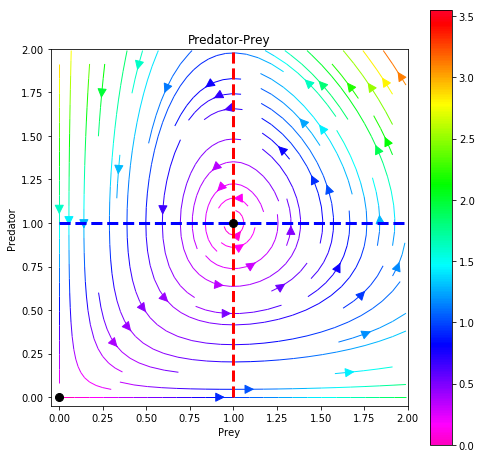

In [73]:
rangeU = (0, 2.0)
rangeV = (0, 2.0)
meshU, meshV = np.meshgrid(
    np.arange(rangeU[0], rangeU[1], .01),
    np.arange(rangeV[0], rangeV[1], .01))

a = 1.5

U = meshU - meshU*meshV
V = a * meshV*meshU - a * meshV

plotVecField(a, rangeU, rangeV, meshU, meshV, sol=None)

In [74]:
# 初期値
u = 1.25
v = 0.66
t = 0.0
a = 1.5

# 時間の設定
dt = 0.0001
tEnd = 20
iEnd = int(tEnd/dt)+1

uList = [u]
vList = [v]
tList = [t]
for i in range(iEnd):
    t = dt*i
    uu = u + dt*u*(1-v)
    vv = v + dt*a*v*(u-1)
    u = uu
    v = vv
    tList.append(t)
    uList.append(u)
    vList.append(v)

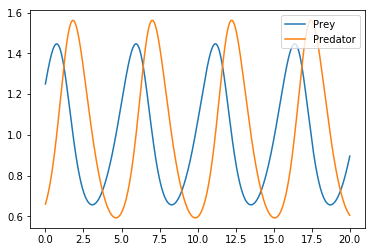

In [75]:
# 時間発展のプロット
plt.plot(tList, uList)
plt.plot(tList, vList)
plt.legend(["Prey", "Predator"], loc='upper right')

Text(0, 0.5, 'Predator')

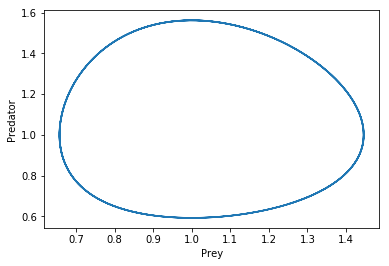

In [76]:
# 相図
plt.plot(uList, vList)
plt.xlabel("Prey")
plt.ylabel("Predator")

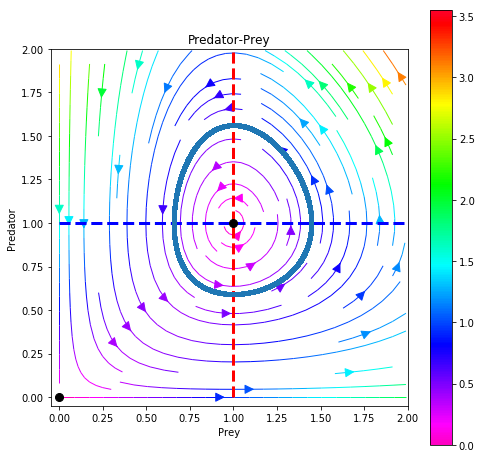

In [77]:
rangeU = (0, 2.0)
rangeV = (0, 2.0)
meshU, meshV = np.meshgrid(
    np.arange(rangeU[0], rangeU[1], .01),
    np.arange(rangeV[0], rangeV[1], .01))

a = 1.5

U = meshU - meshU*meshV
V = a * meshV*meshU - a * meshV

plotVecField(a, rangeU, rangeV, meshU, meshV, sol=[uList, vList])

## 練習：薬物動態シミュレーション

### 急速静注

定義式
$$
\frac{dX}{dt} = - k_e X
$$

(1) 定義式を表示せよ

(2) 一般解を求めよ

(3) 初期値100のときの特殊解を求めよ

(4) (3)においてk_e = 0.693のときのグラフを表示せよ

In [192]:
k_e, t = sym.symbols("k_e t")

In [193]:
X = sym.Function('X')

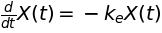

In [194]:
eq1 = sym.Eq(X(t).diff(t,1), -k_e * X(t))
eq1

In [195]:
# 一般解
ans = sym.dsolve(eq1, hint = "separable")
ans

In [196]:
# 特殊解
ans = sym.dsolve(eq1, ics={X(0):100}, hint = "separable")
ans

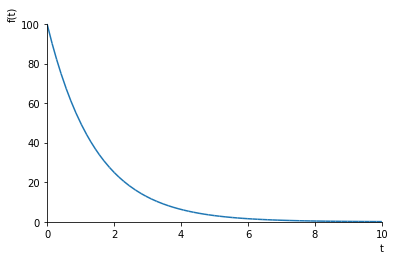

In [197]:
ans2 = ans.subs({k_e:0.693})

plot(ans2.rhs, (t, 0, 10))

### 経口投与
定義式
$$
\frac{dX}{dt} = k_a X_a - k_e X \ ...(A) , \\
\frac{dX_a}{dt} = - k_a X_a \ ...(B)
$$

(1) 2つの定義式をそれぞれ表示せよ

(2) X_a の初期値が F ・ D のときの(B)の特殊解を求めよ

(3) (2)の結果より，(A)にX_aの値を代入せよ（.replaceを用いる）

(4) Cの初期値100のときの特殊解を求めよ

(5) (4)においてF = 0.8, D = 100, k_e = 0.15, k_a = 0.8のときのグラフを表示せよ

In [203]:
k_e, k_a, t, D, F = sym.symbols("k_e k_a t D F")

In [199]:
X = sym.Function('X')
Xa = sym.Function('Xa')

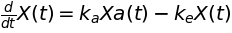

In [200]:
eqa = sym.Eq(X(t).diff(t,1), k_a * Xa(t) - k_e * X(t))
eqa

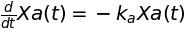

In [201]:
eqb = sym.Eq(Xa(t).diff(t,1), - k_a * Xa(t))
eqb

In [204]:
eqb_ans = sym.dsolve(eqb, ics={Xa(0):F * D}, hint = "separable")
eqb_ans

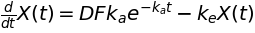

In [205]:
eq = eqa.replace(Xa(t), D * F * sym.exp(-k_a * t))
eq

In [206]:
eq_ans = sym.dsolve(eq, ics={X(0):0},  hint = "1st_linear")
eq_ans

       ⎛       ⎛⎧        kₑ⋅t                    ⎞                          ⎞ 
       ⎜       ⎜⎪      -ℯ                        ⎟   ⎛⎧ D⋅F⋅kₐ             ⎞⎟ 
       ⎜       ⎜⎪───────────────────  for kₐ ≠ kₑ⎟   ⎜⎪───────  for kₐ ≠ kₑ⎟⎟ 
X(t) = ⎜D⋅F⋅kₐ⋅⎜⎨    kₐ⋅t       kₐ⋅t             ⎟ + ⎜⎨kₐ - kₑ             ⎟⎟⋅
       ⎜       ⎜⎪kₐ⋅ℯ     - kₑ⋅ℯ                 ⎟   ⎜⎪                    ⎟⎟ 
       ⎜       ⎜⎪                                ⎟   ⎝⎩   0      otherwise ⎠⎟ 
       ⎝       ⎝⎩         t            otherwise ⎠                          ⎠ 

      
      
 -kₑ⋅t
ℯ     
      
      
      

In [207]:
eq1 =  eq_ans.subs([(F, 0.8), (D, 100), (k_e, 0.15), (k_a, 0.8)])
eq1

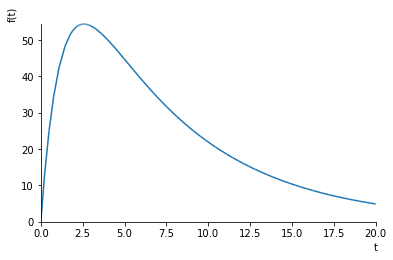

In [209]:
plot(eq1.rhs, (t, 0, 20))

# 量子コンピュータ基礎

https://github.com/qulacs/quantum-native-dojo%7C